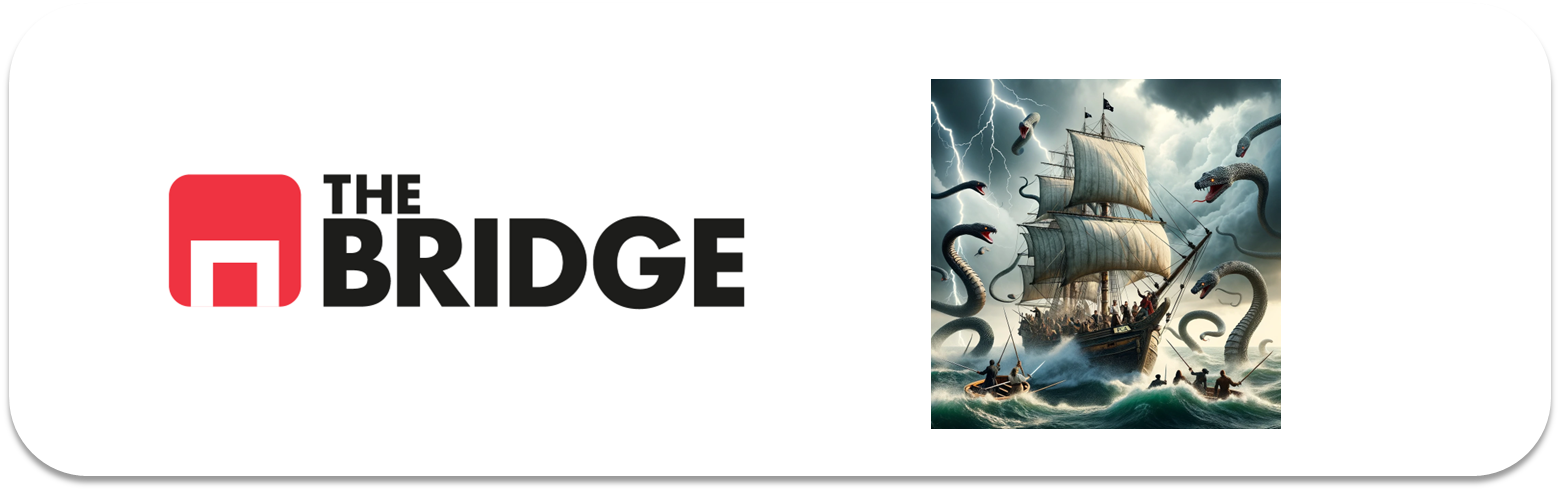

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para manipulación y análisis de datos
import numpy as np
import pandas as pd

# Librerías para manejo de advertencias
import warnings
warnings.simplefilter("ignore")
pd.option_context('mode.use_inf_as_na', True)


# Librerías para preprocesamiento de datos
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

# Librerías para evaluación de modelos
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, mutual_info_score


# Librerías para optimización de hiperparámetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# Librerías para ensamblado de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Librerías para reducción de dimensionalidad
from sklearn.decomposition import PCA

# Librerías para seleccionar features a través de ML
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold

from pprint import pprint


from toolbox_DS import *
from bootcampviztools import *

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


### Carga de datos

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head(8)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df.rename(columns={'SeriousDlqin2yrs':'target'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [6]:
describe_df(df).T

,DATE_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
target,int64,0.0,2,0.02
RevolvingUtilizationOfUnsecuredLines,float64,0.0,10764,85.86
age,int64,0.0,78,0.62
NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,10,0.08
DebtRatio,float64,0.0,11547,92.1
MonthlyIncome,float64,5.75,4167,35.27
NumberOfOpenCreditLinesAndLoans,int64,0.0,43,0.34
NumberOfTimes90DaysLate,int64,0.0,13,0.1
NumberRealEstateLoansOrLines,int64,0.0,16,0.13
NumberOfTime60-89DaysPastDueNotWorse,int64,0.0,8,0.06


#### Variable target

In [7]:
df['target'].value_counts(normalize = True)

target
0    0.931084
1    0.068916
Name: proportion, dtype: float64

<Axes: >

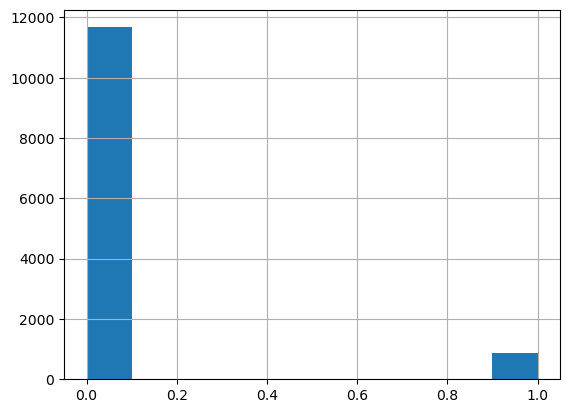

In [8]:
df['target'].hist()

### Limpieza y modelado de datos
Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.


##### Nulos
Elimino columnas por contener nulos:
- MonthlyIncome
- NumberOfDependents

In [9]:
df.drop(columns=(['MonthlyIncome', 'NumberOfDependents']), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   target                                12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 6   NumberOfTimes90DaysLate               12537 non-null  int64  
 7   NumberRealEstateLoansOrLines          12537 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 881.6 KB


##### Conversión a categóricas

In [10]:
df.columns

Index(['target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

In [13]:
features_number = df.loc[:,df.columns.str.contains('Number')]
features_number = features_number.columns.tolist()
features_number


['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [14]:
df[features_number].describe().round(2)

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,12537.00,12537.00,12537.00,12537.00,12537.00
mean,0.41,8.48,0.26,1.00,0.23
std,4.06,5.17,4.04,1.13,4.02
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,5.00,0.00,0.00,0.00
50%,0.00,8.00,0.00,1.00,0.00
75%,0.00,11.00,0.00,2.00,0.00
max,98.00,49.00,98.00,19.00,98.00


In [15]:
for col in features_number:
    valor = df[col].unique()
    print(f'{col}:', sorted(valor))

NumberOfTime30-59DaysPastDueNotWorse: [0, 1, 2, 3, 4, 5, 6, 7, 8, 98]
NumberOfOpenCreditLinesAndLoans: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 43, 48, 49]
NumberOfTimes90DaysLate: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 98]
NumberRealEstateLoansOrLines: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 19]
NumberOfTime60-89DaysPastDueNotWorse: [0, 1, 2, 3, 4, 5, 11, 98]


In [16]:
for col in features_number:
    print(df[col].value_counts(normalize=True))
    print()

NumberOfTime30-59DaysPastDueNotWorse
0     0.837521
1     0.109835
2     0.031985
3     0.010210
4     0.005105
5     0.001835
98    0.001675
6     0.001595
8     0.000160
7     0.000080
Name: proportion, dtype: float64

NumberOfOpenCreditLinesAndLoans
7     0.091569
6     0.086703
8     0.082715
5     0.082556
9     0.077929
4     0.074579
10    0.062375
11    0.058387
3     0.057590
12    0.046263
2     0.043631
13    0.036612
1     0.033182
14    0.029353
15    0.027199
16    0.019064
17    0.017309
0     0.015315
18    0.012204
19    0.010290
20    0.009412
21    0.004945
22    0.004866
23    0.003111
24    0.003031
25    0.002393
26    0.001516
27    0.001276
28    0.001037
30    0.000798
29    0.000798
31    0.000558
33    0.000319
32    0.000239
34    0.000160
35    0.000160
48    0.000080
41    0.000080
49    0.000080
36    0.000080
43    0.000080
38    0.000080
40    0.000080
Name: proportion, dtype: float64

NumberOfTimes90DaysLate
0     0.944325
1     0.032863
2     0.011725

Para las variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate y NumberOfTime60-89DaysPastDueNotWorse, dado que más del 75% de los valores son 0, voy a hacer una división combirtiéndolas a binarias.  
La variable NumberOfOpenCreditLinesAndLoans, va a tener 4 categorías.  
La variable NumberRealEstateLoansOrLines, va a tener 3 categorías. 

In [17]:
for n in ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse']:
    df[f'bin_{n}'] = df[n].apply(lambda x: 0 if x < 1 else 1)

In [18]:
categoria = [(df['NumberOfOpenCreditLinesAndLoans'] < 6),
             (df['NumberOfOpenCreditLinesAndLoans']> 5) & (df['NumberOfOpenCreditLinesAndLoans'] < 9),
             (df['NumberOfOpenCreditLinesAndLoans']> 8) & (df['NumberOfOpenCreditLinesAndLoans'] < 12),
             (df['NumberOfOpenCreditLinesAndLoans'] > 11)

]
valores = ['bajo','medio','alto', 'muy_alto']

df['NumberOfOpenCreditLinesAndLoans_disc'] = np.select(categoria, valores)

In [19]:
categoria = [(df['NumberRealEstateLoansOrLines'] < 2),
             (df['NumberRealEstateLoansOrLines']> 1) & (df['NumberRealEstateLoansOrLines'] < 19),
             (df['NumberRealEstateLoansOrLines'] > 18)

]
valores = ['bajo','medio','alto']

df['NumberRealEstateLoansOrLines_disc'] = np.select(categoria, valores)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   target                                    12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines      12537 non-null  float64
 2   age                                       12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse      12537 non-null  int64  
 4   DebtRatio                                 12537 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans           12537 non-null  int64  
 6   NumberOfTimes90DaysLate                   12537 non-null  int64  
 7   NumberRealEstateLoansOrLines              12537 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse      12537 non-null  int64  
 9   bin_NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 10  bin_NumberOfTimes90DaysLate       

In [21]:
df.columns

Index(['target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'bin_NumberOfTime30-59DaysPastDueNotWorse',
       'bin_NumberOfTimes90DaysLate',
       'bin_NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans_disc',
       'NumberRealEstateLoansOrLines_disc'],
      dtype='object')

In [22]:
df_copy = df.copy()
df.drop(columns=(['NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']),inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   target                                    12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines      12537 non-null  float64
 2   age                                       12537 non-null  int64  
 3   DebtRatio                                 12537 non-null  float64
 4   bin_NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 5   bin_NumberOfTimes90DaysLate               12537 non-null  int64  
 6   bin_NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 7   NumberOfOpenCreditLinesAndLoans_disc      12537 non-null  object 
 8   NumberRealEstateLoansOrLines_disc         12537 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 881.6+ KB


In [24]:
features_num = df.select_dtypes(['int','float']).columns.tolist()
features_cat = df.select_dtypes(['object']).columns.tolist()

### Mini EDA

Para target
*************************


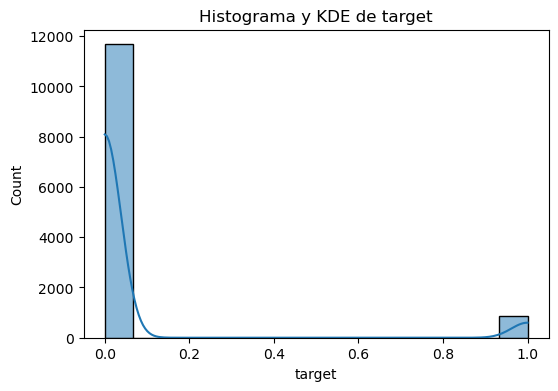

count    12537.00
mean         0.07
std          0.25
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: target, dtype: float64

La moda es 0.00, el coeficiente de variación es 367.58% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.40, valores extendidos a la derecha

Curtosis: 9.58. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=4382.60

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 864 y suponen en proporción 6.89%

La variable target puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=9.58, asimetria=3.4

Para RevolvingUtilizationOfUnsecuredLines
*************************


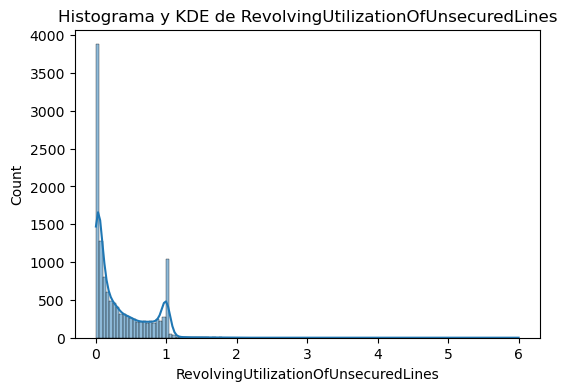

count    12537.00
mean         0.33
std          0.37
min          0.00
25%          0.03
50%          0.16
75%          0.58
max          6.00
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

La moda es 0.00, el coeficiente de variación es 111.44% y el IQR es 0.55

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.47, valores extendidos a la derecha

Curtosis: 7.41. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=820.06

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 8 y suponen en proporción 0.06%

La variable RevolvingUtilizationOfUnsecuredLines puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=7.41, asimetria=1.47

Para age
*************************


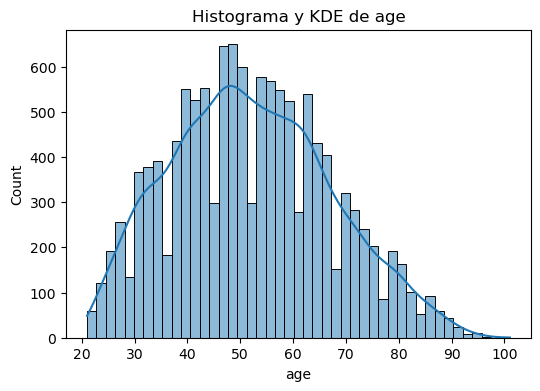

count    12537.00
mean        52.08
std         15.08
min         21.00
25%         41.00
50%         51.00
75%         62.00
max        101.00
Name: age, dtype: float64

La moda es 47.00, el coeficiente de variación es 28.95% y el IQR es 21.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Se puede considerar simétrica

Curtosis: -0.51. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=27.06

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 0 y suponen en proporción 0.0%

Para DebtRatio
*************************


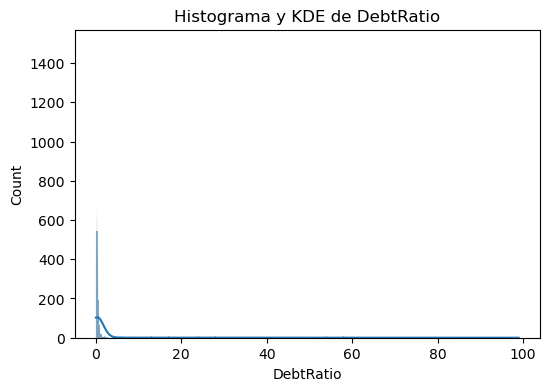

count    12537.00
mean         1.90
std          9.12
min          0.00
25%          0.14
50%          0.30
75%          0.51
max         99.00
Name: DebtRatio, dtype: float64

La moda es 0.00, el coeficiente de variación es 479.55% y el IQR es 0.36

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 7.07, valores extendidos a la derecha

Curtosis: 53.68. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=4065.88

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 714 y suponen en proporción 5.7%

La variable DebtRatio puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=53.68, asimetria=7.07

Para bin_NumberOfTime30-59DaysPastDueNotWorse
*************************


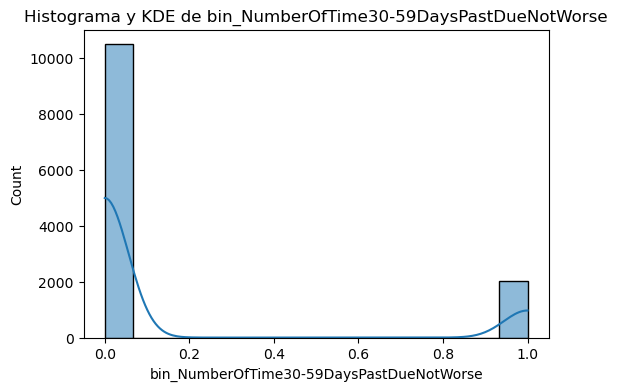

count    12537.00
mean         0.16
std          0.37
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: bin_NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

La moda es 0.00, el coeficiente de variación es 227.05% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 1.83, valores extendidos a la derecha

Curtosis: 1.35. Poco riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=3621.24

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 2037 y suponen en proporción 16.25%

Para bin_NumberOfTimes90DaysLate
*************************


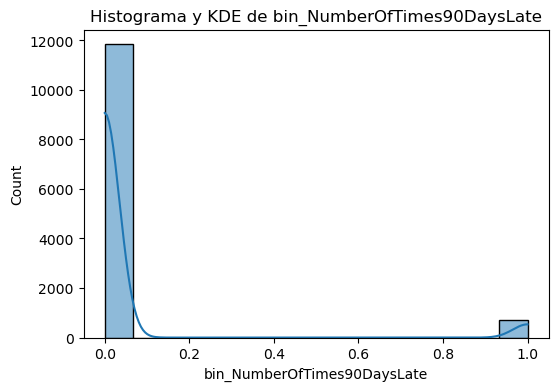

count    12537.00
mean         0.06
std          0.23
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: bin_NumberOfTimes90DaysLate, dtype: float64

La moda es 0.00, el coeficiente de variación es 411.86% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 3.88, valores extendidos a la derecha

Curtosis: 13.02. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=4485.51

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 698 y suponen en proporción 5.57%

La variable bin_NumberOfTimes90DaysLate puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=13.02, asimetria=3.88

Para bin_NumberOfTime60-89DaysPastDueNotWorse
*************************


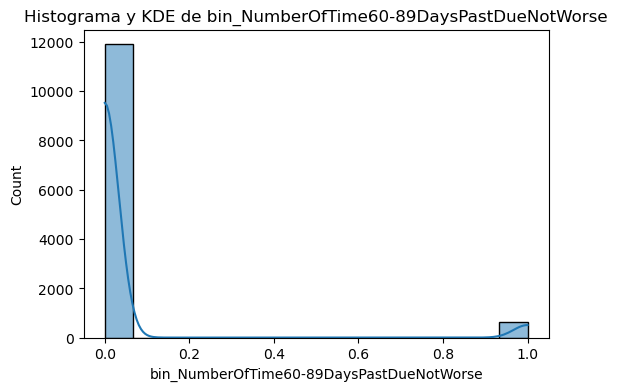

count    12537.00
mean         0.05
std          0.22
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: bin_NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

La moda es 0.00, el coeficiente de variación es 432.59% y el IQR es 0.00

Prueba Shapiro-Wilk: p-value=0.0000. No tiene distribución normal

Asimetría: 4.09, valores extendidos a la derecha

Curtosis: 14.77. Riesgo de valores atípicos

Prueba Jarque-Bera: p-value=0.0000

Prueba Anderson-Darling: estadístico=4522.87

Outliers:
Los outliers inferiores son 0 y suponen en proporción 0.0%

Los outliers superiores son 636 y suponen en proporción 5.07%

La variable bin_NumberOfTime60-89DaysPastDueNotWorse puede necesitar una transformación logarítmica debido a heavy tail:
curtosis=14.77, asimetria=4.09

features_log: ['target', 'RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse']

features_no_log: ['age', 'bin_Numb

,Shapiro,Jarque_Bera,Anderson,Asimetría,Curtosis,Outliers_inf_pro,Outliers_sup_pro,Log_transform
target,0.0,0.0,4382.60,3.40,9.58,0.0,6.89,True
RevolvingUtilizationOfUnsecuredLines,0.0,0.0,820.06,1.47,7.41,0.0,0.06,True
age,0.0,0.0,27.06,0.25,-0.51,0.0,0.00,False
DebtRatio,0.0,0.0,4065.88,7.07,53.68,0.0,5.70,True
bin_NumberOfTime30-59DaysPastDueNotWorse,0.0,0.0,3621.24,1.83,1.35,0.0,16.25,False
bin_NumberOfTimes90DaysLate,0.0,0.0,4485.51,3.88,13.02,0.0,5.57,True
bin_NumberOfTime60-89DaysPastDueNotWorse,0.0,0.0,4522.87,4.09,14.77,0.0,5.07,True


In [25]:
analisis_univariable_numericas(df,features_num)

#### Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.

Matriz de correlación con la variable target:
bin_NumberOfTimes90DaysLate                 0.348672
RevolvingUtilizationOfUnsecuredLines        0.281900
bin_NumberOfTime60-89DaysPastDueNotWorse    0.252788
bin_NumberOfTime30-59DaysPastDueNotWorse    0.226732
age                                        -0.116908
DebtRatio                                  -0.017445
Name: target, dtype: float64



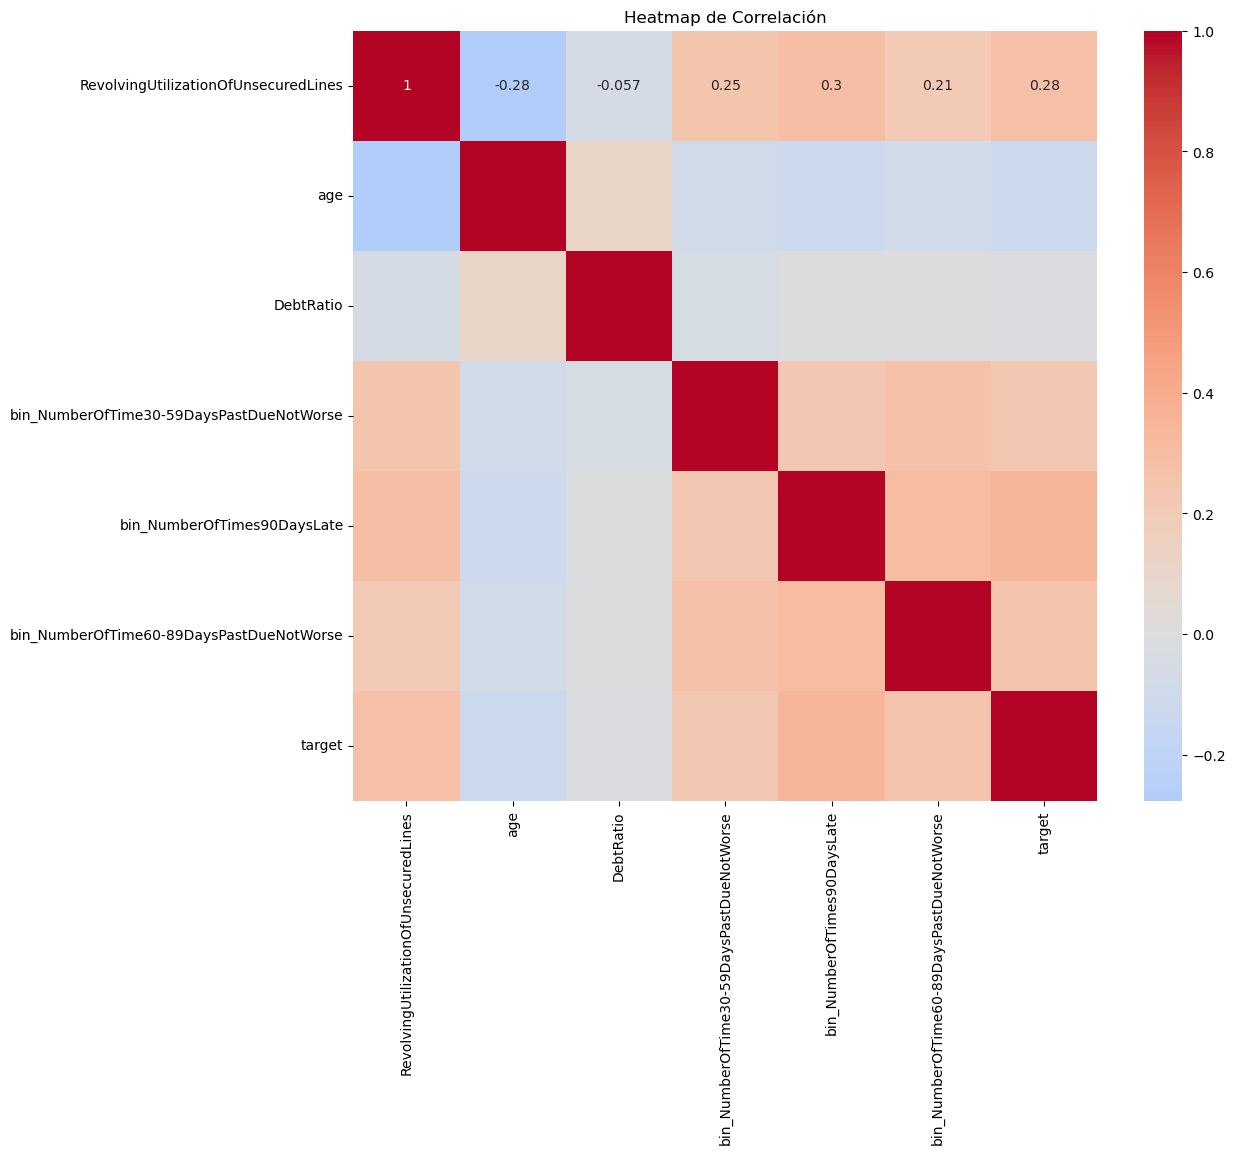

Variables con correlación por debajo del 20%: ['age', 'DebtRatio']
Variables con correlación por encima del 20%: ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse', 'target']

Prueba de correlación para RevolvingUtilizationOfUnsecuredLines vs target
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: 0.28
p-valor: 0.000
La variable RevolvingUtilizationOfUnsecuredLines está significativamente asociada con target (p < 0.05 y correlación >= 0.2). Podría ser útil para el modelo.

Prueba de correlación para age vs target
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: -0.12
p-valor: 0.000
La variable age no está significativamente asociada con target (p >= 0.05 o correlación < 0.2).

Prueba de correlación para DebtRatio vs target
****************************************
Prueba de co

{'significant_vars': ['RevolvingUtilizationOfUnsecuredLines',
  'bin_NumberOfTime30-59DaysPastDueNotWorse',
  'bin_NumberOfTimes90DaysLate',
  'bin_NumberOfTime60-89DaysPastDueNotWorse'],
 'high_vif_vars': [],
 'high_corr_vars': [],
 'low_corr_vars': []}

In [26]:
features_num.remove('target')
analisis_bivariable_numericas_numerica(df,'target',features_num)

In [27]:
features_cat

['NumberOfOpenCreditLinesAndLoans_disc', 'NumberRealEstateLoansOrLines_disc']

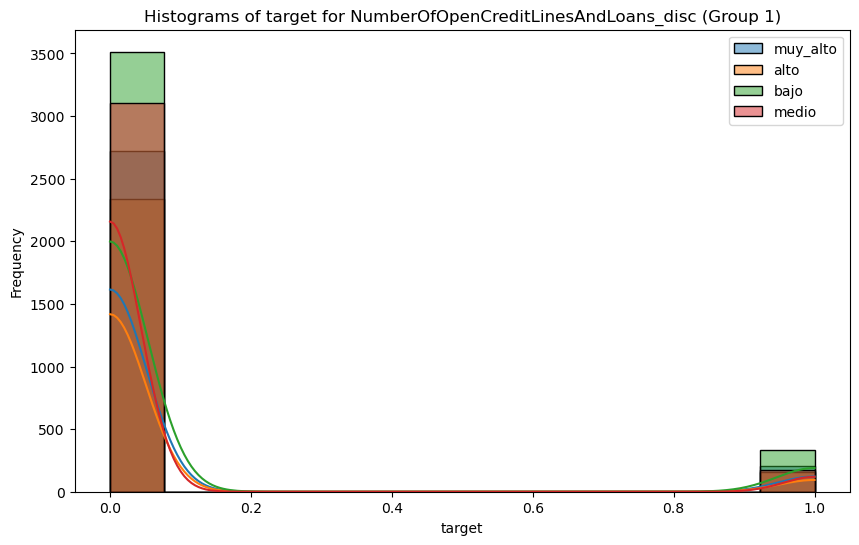

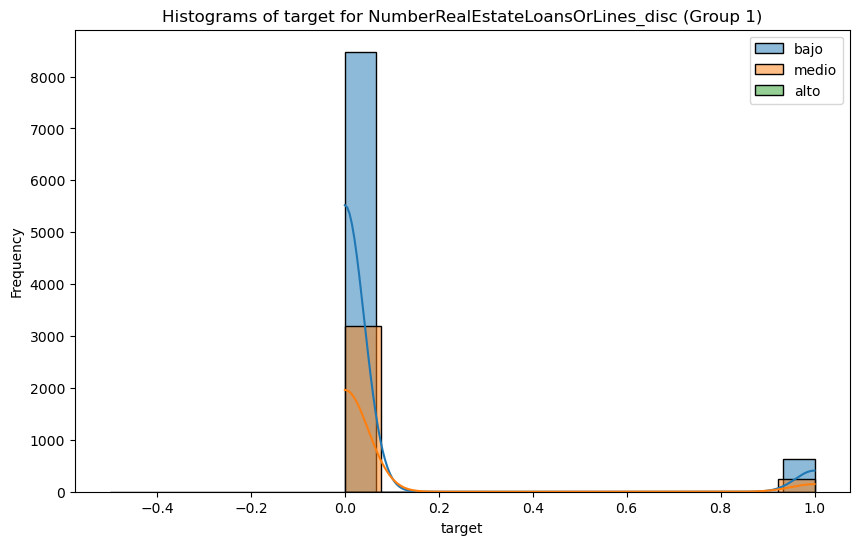

In [28]:
for col in features_cat:
    plot_grouped_histograms(df,col,'target',4)

Ambas variables categóricas no nos dicen mucho

###### Conclusiones análisis visual y estadístico:  
Conclusiones análisis visual y estadístico:    
- Variables numéricas:
    - primer nivel: ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse']
    - segundo nivel: ['age'] (por meterla porque no están signiicativametne asociadas a la variable Target). 
La que descarto es DebtRatio. No está asociada significativamente a la variable target y además su correlación es muy baja.
- Variables categóricas:
    - primer nivel: ninguna
    - segundo nivel: ['NumberOfOpenCreditLinesAndLoans_disc', 'NumberRealEstateLoansOrLines_disc'] y por meterlas....

In [29]:
features_visual_first = ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse']
features_visual_second = ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse','NumberOfOpenCreditLinesAndLoans_disc', 'NumberRealEstateLoansOrLines_disc','age']

### Tratamiento de variables

Hice el tratamiento de features pero no cambiaba los resultados, si acaso en el SelectFromModel, en el que al incrementar la cantidad de features, pues el modelo cogía más. 
Pero el resultado final en el hard-voting era el mismo así como en la valización cruzada con los tres modelos.

In [30]:
# df_copy

In [31]:
# df_copy.describe().round(2)

In [32]:
#features_num_tratadas = df_copy.select_dtypes(include=['int','float']).columns.tolist()
#features_num_tratadas.remove('target')
#features_cat_tratadas = df_copy.select_dtypes(include=('object')).columns.tolist()

In [33]:
#features_num_tratadas

In [34]:
#min_max_scaler = MinMaxScaler(feature_range=(0, 1))

#df_copy[features_num_tratadas] = min_max_scaler.fit_transform(df_copy[features_num_tratadas])

In [35]:
#features_cat_tratadas

In [36]:
#df_copy = pd.get_dummies(df_copy, columns=features_cat_tratadas, dtype=int)

In [37]:
#df_copy

In [38]:
#df_copy.describe().round(2)

In [39]:
#features = df_copy.select_dtypes(include=(['int','float'])).columns.tolist()
#features

In [40]:
#columnas_eliminar = ['NumberRealEstateLoansOrLines','NumberOfOpenCreditLinesAndLoans']
#for col in columnas_eliminar:
#    features.remove(col)
#features

#### Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information
Se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [41]:
#features_num = features
#features_num.remove('target')
features_num

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberOfTime60-89DaysPastDueNotWorse']

In [42]:
# Separo en X e Y
X_train = df[features_num]
y_train = df['target']

# Instancio el selector
selector = SelectKBest(f_classif,k = 4)

# Lo entreno con X_train e y_train
x_data_kbest = selector.fit_transform(X_train,y_train)

# Transformo el resultado en un df
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
X_train_kbest.columns

Index(['RevolvingUtilizationOfUnsecuredLines',
       'bin_NumberOfTime30-59DaysPastDueNotWorse',
       'bin_NumberOfTimes90DaysLate',
       'bin_NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

Si le pongo 6, me coge todas, así que he puesto 4. Y ha eliminado las mismas que en el análisis visual, age y DebtRatio.

In [43]:
# Vamos a ver con el mutual information score:
target = 'target'

for col in features_cat:
     print(f"MI({col};{target}):", mutual_info_score(df[col],df['target']))

MI(NumberOfOpenCreditLinesAndLoans_disc;target): 0.0013781406767759963
MI(NumberRealEstateLoansOrLines_disc;target): 7.1200987820381045e-06


Ambas columnas categóricas no están muy relacionadas con la variable target

###### Conclusión SelectKbest y ANNOVA.  
Conclusión SelectKbest y ANNOVA.  
- Variables numéricas:
    - primer nivel:['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse'] 

In [44]:
features_ANNOVA_first = ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTime30-59DaysPastDueNotWorse', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse']

#### Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
Se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [45]:
# Instancio un modelo y lo entreno
rf_selector = RandomForestClassifier(max_depth=5,random_state=42,class_weight='balanced')
rf_selector.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [46]:
# Pruebo con la media
rf_selector.feature_importances_[rf_selector.feature_importances_ > rf_selector.feature_importances_.mean()]

array([0.28697311, 0.38441607])

In [47]:
# Y con la mediana
rf_selector.feature_importances_[rf_selector.feature_importances_ > np.median(rf_selector.feature_importances_)]

array([0.28697311, 0.38441607, 0.12706351])

Con la media coge dos features, con la mediana coge tres features.

In [48]:
# Instanciamos el modelo
selector_model = SelectFromModel(estimator=rf_selector,threshold= 'median')

# Entrenamos
selector_model.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, random_state=42),
                threshold='median')

In [49]:
# Saco el nombre de las features que están por encima de la mediana
selector_model.get_feature_names_out()

array(['RevolvingUtilizationOfUnsecuredLines',
       'bin_NumberOfTimes90DaysLate',
       'bin_NumberOfTime60-89DaysPastDueNotWorse'], dtype=object)

###### Conclusión SelectFromModel:  
Conclusión SelectFromModel:  
Tomando como referencia las que están por encima de la mediana en el feature_importances_ nos dan 3 features: ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse']  
Así que estas forman la selección de este modelo.

In [50]:
features_selector_model_first = ['RevolvingUtilizationOfUnsecuredLines', 'bin_NumberOfTimes90DaysLate', 'bin_NumberOfTime60-89DaysPastDueNotWorse']

#### Selección de las mejores features empleando RFE.
Se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [51]:
# Instnacio modelo de clasificación
rf_RFE = RandomForestClassifier(max_depth=5,random_state=42,class_weight='balanced')
# Sobre el modelo instancio el rfe
rfe = RFE(
    estimator=rf_RFE,
    n_features_to_select=4,
    step=1
)

# Entreno el modelo rfe
rfe.fit(X_train,y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_,columns=['ranking'], index=features_num).sort_values('ranking')

[1 3 1 2 1 1]


,ranking
RevolvingUtilizationOfUnsecuredLines,1
DebtRatio,1
bin_NumberOfTimes90DaysLate,1
bin_NumberOfTime60-89DaysPastDueNotWorse,1
bin_NumberOfTime30-59DaysPastDueNotWorse,2
age,3


###### Conclusiones RFE
Conclusiones RFE:  
Teniendo en cuentaque son solo 6, he cogido las 4 primeras.  
A diferencia de los otros modelos que cogían las mismas, para este modelo incluye DebtRatio, a pesar de no ser significativa desde el punto de vista estadístico.  
Para rfe la selección de features son: ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']

In [52]:
features_rfe_first = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse']

#### Selección de las mejores features empleando SFS.
Se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [53]:
# Instancio modelo clasificación
rf_sfs = RandomForestClassifier(max_depth=5,random_state=42, class_weight='balanced')
# Instancio el modelo de la features selection
sfs_fordward = SequentialFeatureSelector(
    rf_sfs,
    n_features_to_select=4,
    cv = 4,
    scoring='balanced_accuracy' # dado que la variable target está muy desbalanceada.
)

# Entreno el modelo de features_selection
sfs_fordward.fit(X_train,y_train)

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(max_depth=5,
                                                           random_state=42),
                          n_features_to_select=4, scoring='balanced_accuracy')

In [54]:
# printar las features seleccionadas
print("Elegidasd SFS:", sfs_fordward.get_feature_names_out())

Elegidasd SFS: ['RevolvingUtilizationOfUnsecuredLines' 'DebtRatio'
 'bin_NumberOfTimes90DaysLate' 'bin_NumberOfTime60-89DaysPastDueNotWorse']


###### Conclusiones SFS (SequentialFeaturesSelection)
Conclusiones SFS:  
Para este modelo, las features son ['RevolvingUtilizationOfUnsecuredLines' 'DebtRatio', 'bin_NumberOfTimes90DaysLate' 'bin_NumberOfTime60-89DaysPastDueNotWorse']

In [55]:
features_sfs_first = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'bin_NumberOfTimes90DaysLate' ,'bin_NumberOfTime60-89DaysPastDueNotWorse']

#### Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.
Se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

In [56]:
listas_features = [features_visual_first,features_ANNOVA_first,features_selector_model_first,features_rfe_first,features_sfs_first]
dicc_hard_voting = {}

for col in df.columns:
    count = 0
    for lista in listas_features:
        if col in lista:
            count +=1
    dicc_hard_voting[col]=count
pprint(dicc_hard_voting)

{'DebtRatio': 2,
 'NumberOfOpenCreditLinesAndLoans_disc': 0,
 'NumberRealEstateLoansOrLines_disc': 0,
 'RevolvingUtilizationOfUnsecuredLines': 5,
 'age': 0,
 'bin_NumberOfTime30-59DaysPastDueNotWorse': 2,
 'bin_NumberOfTime60-89DaysPastDueNotWorse': 5,
 'bin_NumberOfTimes90DaysLate': 5,
 'target': 0}


##### Conclusiones hard_voting
Conclusciones hard_voting
Según los reultados, las tres variables que aparecen en todos son:  
['RevolvingUtilizationOfUnsecuredLines','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate'],

In [57]:
features_hardvoting_first = ['RevolvingUtilizationOfUnsecuredLines','bin_NumberOfTime60-89DaysPastDueNotWorse','bin_NumberOfTimes90DaysLate']

### Entrenamiento de modelos ML
Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

In [58]:
# Lista de features
lista_features_final = [features_visual_first,features_ANNOVA_first,features_selector_model_first,features_rfe_first,features_sfs_first,features_hardvoting_first]
features_list_name = ['Visual', 'ANNOVA', 'SelectFromModel','RFE','SFS','Hard-voting']
# Modelos
rg_log = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
rf = RandomForestClassifier(max_depth=5, random_state = 42,class_weight='balanced')
cat = CatBoostClassifier(max_depth=5,random_state=42, verbose = False)

# Nombre de los modelos:
model_name = ['LogisticRegression','RandomForestClassifier','CatBoostClassifier']

# Variables con modelos:
model_list = [rg_log,rf,cat]

for i,lista in enumerate(lista_features_final):
    for j,modelo in enumerate(model_list):
        score = np.mean(cross_val_score(modelo, df[lista], df['target'], cv = 4, scoring = 'balanced_accuracy')).round(2)
        print(f'Lista: {features_list_name[i]} y modelo: {model_name[j]}: {score}')
    print()


Lista: Visual y modelo: LogisticRegression: 0.76
Lista: Visual y modelo: RandomForestClassifier: 0.74
Lista: Visual y modelo: CatBoostClassifier: 0.57

Lista: ANNOVA y modelo: LogisticRegression: 0.76
Lista: ANNOVA y modelo: RandomForestClassifier: 0.74
Lista: ANNOVA y modelo: CatBoostClassifier: 0.57

Lista: SelectFromModel y modelo: LogisticRegression: 0.75
Lista: SelectFromModel y modelo: RandomForestClassifier: 0.75
Lista: SelectFromModel y modelo: CatBoostClassifier: 0.57

Lista: RFE y modelo: LogisticRegression: 0.76
Lista: RFE y modelo: RandomForestClassifier: 0.75
Lista: RFE y modelo: CatBoostClassifier: 0.57

Lista: SFS y modelo: LogisticRegression: 0.76
Lista: SFS y modelo: RandomForestClassifier: 0.75
Lista: SFS y modelo: CatBoostClassifier: 0.57

Lista: Hard-voting y modelo: LogisticRegression: 0.75
Lista: Hard-voting y modelo: RandomForestClassifier: 0.75
Lista: Hard-voting y modelo: CatBoostClassifier: 0.57



El mejor modelo es la regresión logística.  
Al poner class_weight='balanced' ha cambiado por completo el resutlado pasando de 0.58 a 0.76 para la regresión logística y un punto menos de diferencia para el randomforest.  
El modelo de catBoost al parecer no tiene la posiblidad de poner como class_weigt el 'balanced'

### Optimización hiperparámetros
Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.

In [59]:
param_grid = [
    {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [1000, 2000, 3000]},
    {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': [1000, 2000, 3000]}
]

rg_log_opti = GridSearchCV(estimator=rg_log,
                           param_grid=param_grid,
                           scoring="balanced_accuracy",
                           cv=5,
                           n_jobs=-1)

# Realizar la búsqueda aleatoria en el espacio de hiperparámetros
rg_log_opti.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10],
                          'max_iter': [1000, 2000, 3000], 'penalty': ['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10],
                          'max_iter': [1000, 2000, 3000], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                     'saga']}],
             scoring='balanced_accuracy')

In [60]:
rg_log_opti.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

El meter el atributo class_weight como balanceado también ha cambiado los parámetros

In [61]:
y_predict = rg_log_opti.predict(X_train)
accuracy = balanced_accuracy_score(y_train, y_predict)
print(f'El balanced_accuracy es: {accuracy}')
print()
print(classification_report(y_train,y_predict))

El balanced_accuracy es: 0.7623379451155088

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     11673
           1       0.21      0.73      0.33       864

    accuracy                           0.79     12537
   macro avg       0.59      0.76      0.60     12537
weighted avg       0.92      0.79      0.84     12537



He entrenado los modelos usando todos los datos, por lo que no tengo test.

### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.

In [62]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_NumberOfTime60-89DaysPastDueNotWorse
0,0.081892,37,0.070709,0,1,0
1,0.023413,74,0.209197,0,0,0
2,0.000000,43,0.080784,0,0,0
3,0.492754,44,0.412735,0,0,0
4,1.000000,63,0.000000,0,0,0
...,...,...,...,...,...,...
12532,0.197116,59,0.290216,0,0,0
12533,0.036726,62,0.884985,0,0,0
12534,0.120313,49,0.577676,0,0,0
12535,0.252566,63,0.037640,0,0,0


In [63]:
pca_cl = PCA()

pca_cl.fit(X_train)

X_train_pca = pca_cl.transform(X_train)

In [64]:
X_train_pca.shape

(12537, 6)

In [65]:
df_pca = pd.DataFrame(
    data = pca_cl.components_,
    columns=X_train.columns,
    index=[f'PC{n}' for n in range(1,X_train.shape[1]+1)]
)

df_pca

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTimes90DaysLate,bin_NumberOfTime60-89DaysPastDueNotWorse
PC1,-0.006754,0.995192,0.097664,-0.002226,-0.001665,-0.001154
PC2,-0.000507,-0.097673,0.995217,-0.001382,0.000179,0.000079
PC3,0.617808,0.006279,0.001856,0.711245,0.250668,0.222635
PC4,0.744473,0.003675,-0.000191,-0.662710,0.074228,-0.032436
PC5,0.247269,0.000223,0.000643,0.229003,-0.707097,-0.621634
PC6,0.053718,0.000022,0.000019,-0.049967,-0.657013,0.750301


In [66]:
pca_cl.explained_variance_ratio_

array([7.35707400e-01, 2.63135750e-01, 5.60906048e-04, 3.20780792e-04,
       1.65013566e-04, 1.10149672e-04])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.7357074  0.99884315 0.99940406 0.99972484 0.99988985 1.        ]


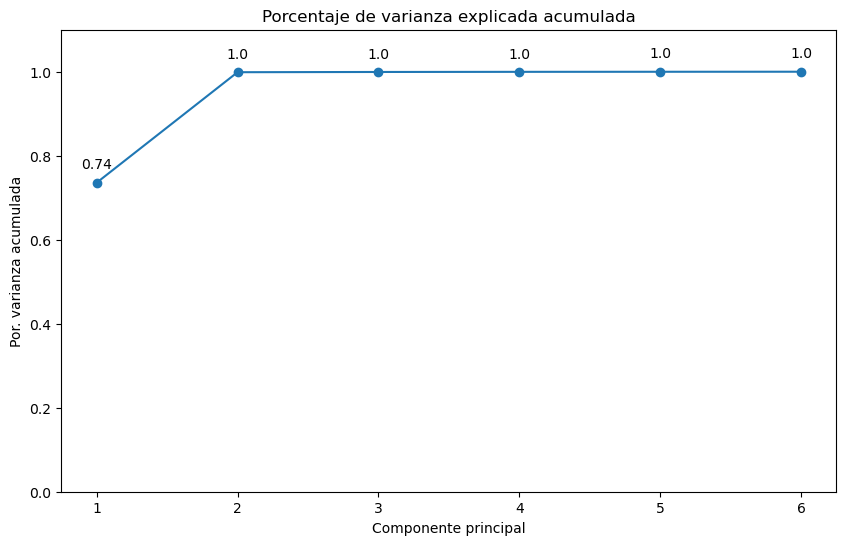

In [67]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_cl.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(
    np.arange(len(X_train.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_cl.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [68]:
lr_pca = LogisticRegression(max_iter = 1000,class_weight='balanced') 
scores_pca = []
for num_PCs in range(1,7):
    print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]# Array de numpy. Al estar ordenadas me quedo con las que quiero.
    score_pca = np.mean(cross_val_score(lr_pca, X_train_pca_reduced, y_train, cv = 4, scoring = "balanced_accuracy"))
    print(score_pca)
    scores_pca.append(score_pca)


Probando con 1 componentes:
0.598975222707046
Probando con 2 componentes:
0.5963830803075154
Probando con 3 componentes:
0.756769162821771
Probando con 4 componentes:
0.7551240882518373
Probando con 5 componentes:
0.7640930786491275
Probando con 6 componentes:
0.7631069774553412


Esto no se corresponde con el gráfico anterior. ¿?????

______________________

Los datos anteriores están sin haber hecho el escalado. A ver qué pasa si escalo los datos.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   target                                    12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines      12537 non-null  float64
 2   age                                       12537 non-null  int64  
 3   DebtRatio                                 12537 non-null  float64
 4   bin_NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 5   bin_NumberOfTimes90DaysLate               12537 non-null  int64  
 6   bin_NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 7   NumberOfOpenCreditLinesAndLoans_disc      12537 non-null  object 
 8   NumberRealEstateLoansOrLines_disc         12537 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 881.6+ KB


In [70]:
features_scaled_pca = df.select_dtypes(include=(['int','float'])).columns.tolist()
features_scaled_pca.remove('target')
features_scaled_pca

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'bin_NumberOfTime30-59DaysPastDueNotWorse',
 'bin_NumberOfTimes90DaysLate',
 'bin_NumberOfTime60-89DaysPastDueNotWorse']

In [71]:
scaler = StandardScaler()

df[features_scaled_pca] = scaler.fit_transform(df[features_scaled_pca])

X_train_pca_scaled = df[features_scaled_pca]
y_train_pca_scaled = df['target']

In [72]:
pca_cl_scaled = PCA()

pca_cl_scaled.fit(X_train_pca_scaled)

X_train_pca = pca_cl_scaled.transform(X_train_pca_scaled)

In [73]:
X_train_pca.shape

(12537, 6)

In [74]:
pca_cl_scaled.explained_variance_ratio_

array([0.31376622, 0.18111208, 0.15435375, 0.12775097, 0.11874686,
       0.10427012])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.31376622 0.4948783  0.64923205 0.77698302 0.89572988 1.        ]


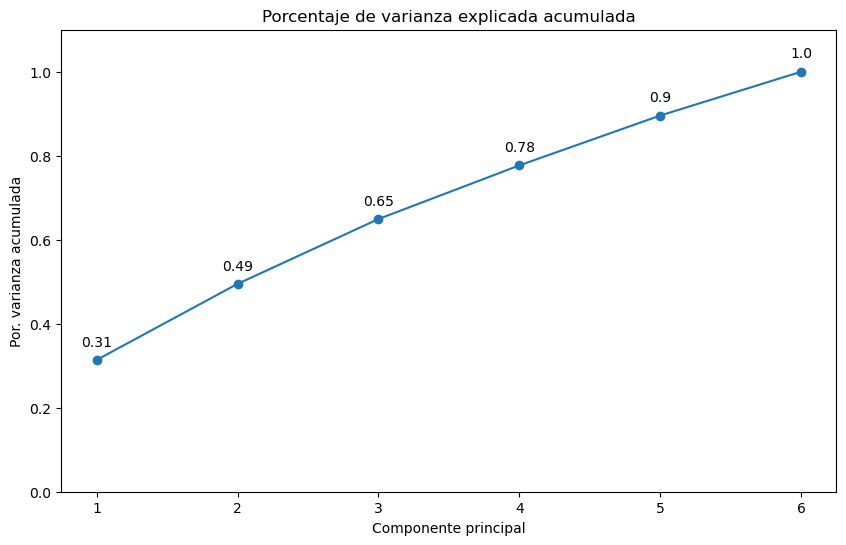

In [75]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca_cl_scaled.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
ax.plot(
    np.arange(len(X_train_pca_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_train_pca_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca_cl_scaled.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Esto parece que tiene algo más de sentido.

In [76]:
lr_pca_scaled = LogisticRegression(max_iter = 1000,class_weight='balanced') 
scores_pca = []
for num_PCs in range(1,7):
    print(f"Probando con {num_PCs} componentes:", sep = " ")
    X_train_pca_reduced = X_train_pca[:,:num_PCs]
    score_pca = np.mean(cross_val_score(lr_pca_scaled, X_train_pca_reduced, y_train_pca_scaled, cv = 4, scoring = "balanced_accuracy"))
    print(score_pca)
    scores_pca.append(score_pca)

Probando con 1 componentes:
0.7617652793460914
Probando con 2 componentes:
0.7637638359399624
Probando con 3 componentes:
0.7631652409232247
Probando con 4 componentes:
0.7645605169638889
Probando con 5 componentes:
0.7614100464626504
Probando con 6 componentes:
0.7632783276952315


Esta parte sigue sin corresponderse con lo anterior...